# Project

## Name: LINZHUO ZHANG

# Problem 1: EDA

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms
per species). Each mushroom is identified as definitely edible, definitely poisonous, or of
unknown edibility and not recommended (the latter class was combined with the poisonous class).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/secondary_data.csv',sep=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


**rows and columns we have in the dataframe**

In [2]:
# your code here 
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 61069
Number of columns: 21


**data types of the columns**

In [3]:
# your code here
pd.set_option("display.max_rows",None)
print(df.dtypes)
pd.reset_option("display.max_rows")

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object


**classification problem**
### Class Labels
edible=e, poisonous=p

In [4]:
# your code here
#print(df['class'].describe())
print(df['class'].value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


### replace target valuable to 0 and 1
edible = 0, poisonous = 1

In [5]:
# poisonous to 1, edible to 0
df['class'] = df['class'].map({'p': 1, 'e': 0})
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,1,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,1,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,1,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,1,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


**Visualize the target variable**

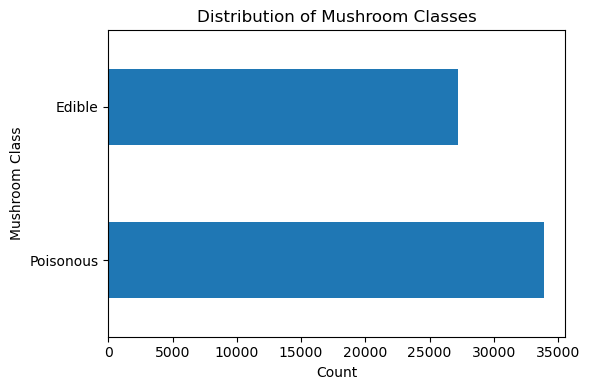

In [6]:
# your code here 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

# Create a mapping dictionary to convert numerical classes to labels
class_mapping = {1: 'Poisonous', 0: 'Edible'}

# Apply the mapping to the 'class' column and create a new column 'class_label'
df['class_label'] = df['class'].map(class_mapping)

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Count the occurrences of each class label and plot a horizontal bar chart
df['class_label'].value_counts().plot.barh()

# Add labels and title to the plot
plt.xlabel('Count')
plt.ylabel('Mushroom Class')
plt.title('Distribution of Mushroom Classes')

plt.savefig('../figures/1.png',dpi=300, bbox_inches="tight")
# Optimize layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

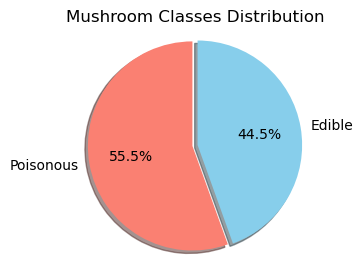

In [7]:
# Define colors for the pie chart (same as bar chart for consistency)
pie_colors = ['salmon', 'skyblue']  # 'Poisonous' and 'Edible'
df['class_label'] = df['class'].map(class_mapping)

# Count the occurrences of each class label
class_counts = df['class_label'].value_counts()
# Create a new figure for the pie chart
plt.figure(figsize=(4, 3))  # Square figure for pie chart

# Plot pie chart
plt.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct='%1.1f%%',  # Display percentages with one decimal
    colors=pie_colors,
    startangle=90,  # Start angle for the first slice
    explode=(0.05, 0),  # Slightly explode the first slice (Poisonous)
    shadow=True  # Add shadow for depth
)

# Add title
plt.title('Mushroom Classes Distribution')

# Ensure the pie chart is a circle
plt.axis('equal')  

plt.savefig('../figures/2.png',dpi=300, bbox_inches="tight")
# Display the pie chart
plt.show()



# Visualization

### Categorical Feature VS Continuous 

In [8]:
df['cap-diameter'].describe()

count    61069.000000
mean         6.733854
std          5.264845
min          0.380000
25%          3.480000
50%          5.860000
75%          8.540000
max         62.340000
Name: cap-diameter, dtype: float64

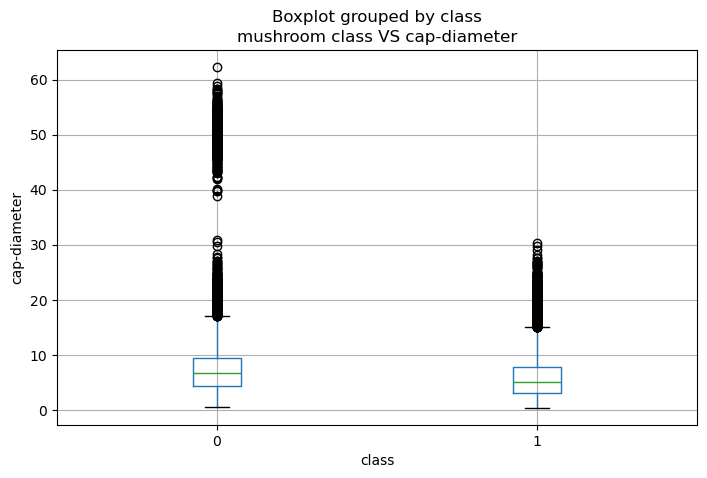

In [9]:
df[['cap-diameter','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS cap-diameter')
plt.xlabel('class')
plt.ylabel('cap-diameter')
plt.savefig('../figures/3.png',dpi=300, bbox_inches="tight")
plt.show()

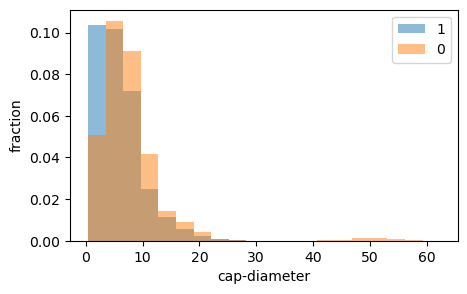

In [10]:

import matplotlib
from matplotlib import pylab as plt

categories = df['class'].unique()
bin_range = (df['cap-diameter'].min(),df['cap-diameter'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['class']==c]['cap-diameter'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('cap-diameter')
plt.savefig('../figures/4.png',dpi=300, bbox_inches="tight")
plt.show()

In [11]:
df['stem-height'].describe()

count    61069.000000
mean         6.581538
std          3.370017
min          0.000000
25%          4.640000
50%          5.950000
75%          7.740000
max         33.920000
Name: stem-height, dtype: float64

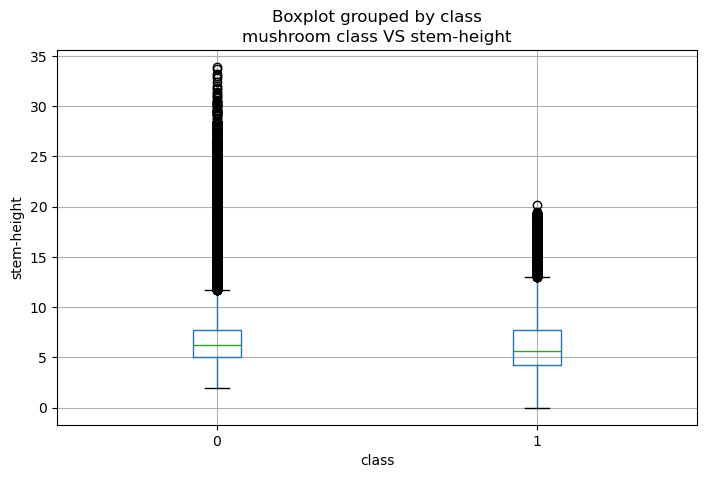

In [12]:
df[['stem-height','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS stem-height')
plt.xlabel('class')
plt.ylabel('stem-height')
plt.savefig('../figures/5.png',dpi=300, bbox_inches="tight")
plt.show()

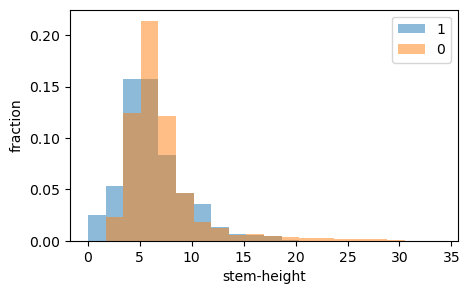

In [13]:
import matplotlib
from matplotlib import pylab as plt

categories = df['class'].unique()
bin_range = (df['stem-height'].min(),df['stem-height'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['class']==c]['stem-height'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('stem-height')
plt.savefig('../figures/6.png',dpi=300, bbox_inches="tight")
plt.show()

In [14]:
df['stem-width'].describe()

count    61069.000000
mean        12.149410
std         10.035955
min          0.000000
25%          5.210000
50%         10.190000
75%         16.570000
max        103.910000
Name: stem-width, dtype: float64

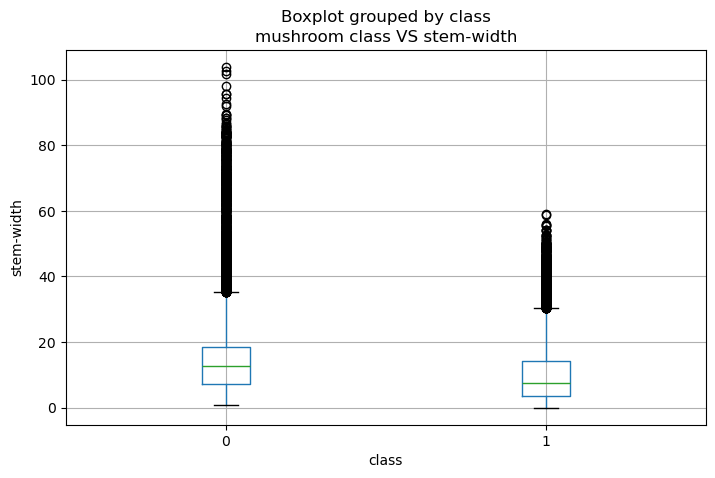

In [15]:
df[['stem-width','class']].boxplot(by='class',figsize=(8,5))
plt.title('mushroom class VS stem-width')
plt.xlabel('class')
plt.ylabel('stem-width')
plt.savefig('../figures/7.png',dpi=300, bbox_inches="tight")
plt.show()

### Categorical Feature VS Categorical Feature

season (n): spring=s, summer=u, autumn=a, winter=w

Class Labels: edible=0, poisonous=1

In [16]:
season_map = {
    's': 'spring',
    'u': 'summer',
    'a': 'fall',
    'w': 'winter'
}

df['season'] = df['season'].map(season_map)

count_matrix = df.groupby(['season', 'class']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

class       0      1
season              
fall    12784  17393
spring   1553   1174
summer   9650  13248
winter   3194   2073
class          0         1
season                    
fall    0.423634  0.576366
spring  0.569490  0.430510
summer  0.421434  0.578566
winter  0.606417  0.393583


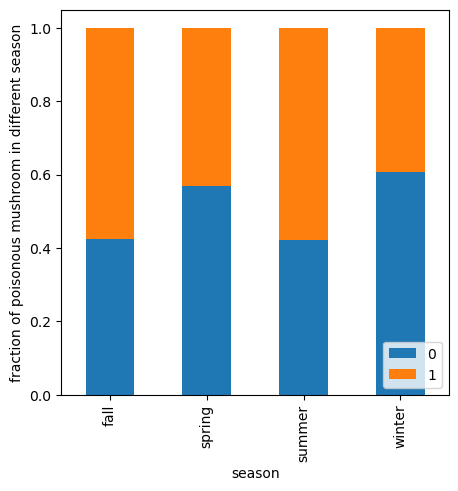

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,5))
plt.ylabel('fraction of poisonous mushroom in different season')
plt.legend(loc=4)
plt.savefig('../figures/8.png',dpi=300, bbox_inches="tight")
plt.show()

veil-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f

Class Labels: edible=0, poisonous=1

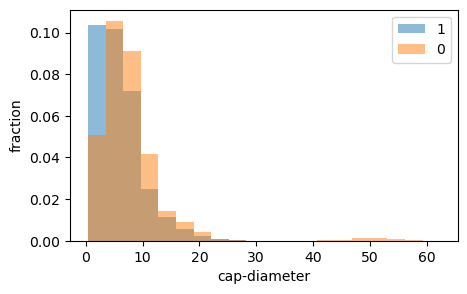

In [18]:

import matplotlib
from matplotlib import pylab as plt

categories = df['class'].unique()
bin_range = (df['cap-diameter'].min(),df['cap-diameter'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['class']==c]['cap-diameter'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('cap-diameter')
plt.savefig('../figures/9.png',dpi=300, bbox_inches="tight")
plt.show()

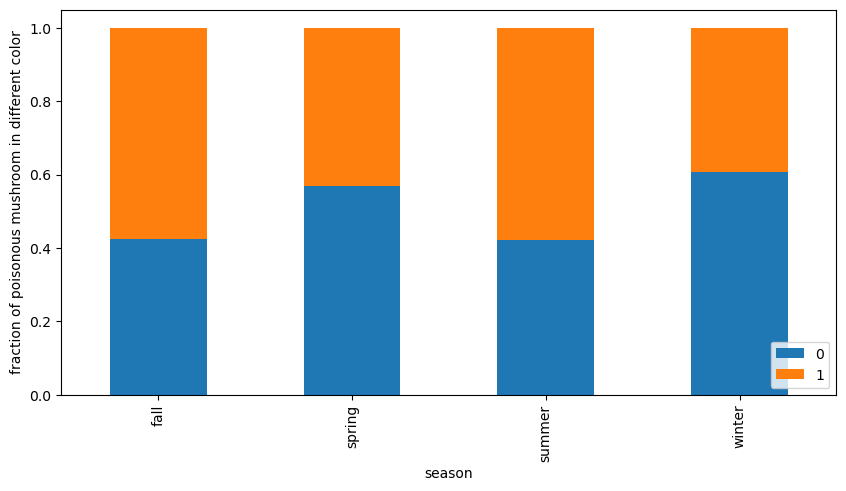

In [19]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(10,5))
plt.ylabel('fraction of poisonous mushroom in different color')
plt.legend(loc=4)
plt.savefig('../figures/10.png',dpi=300, bbox_inches="tight")
plt.show()

### Continuous Feature VS Continuous Feature

In [20]:
nbins = 40

heatmap, xedges, yedges = np.histogram2d(df['stem-width'], df['stem-height'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

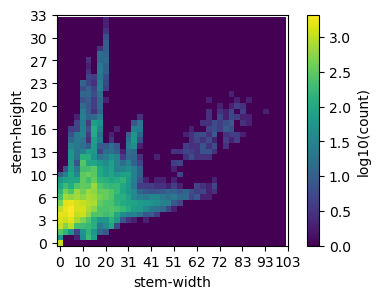

In [21]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(5,3))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('stem-width')
plt.ylabel('stem-height')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.savefig('../figures/11.png',dpi=300, bbox_inches="tight")
plt.show()

# Split and preprocess the dataset

**missing value percentage**

In [22]:

import pandas as pd


df = pd.read_csv('../data/secondary_data.csv',sep=';')


missing_percentage = df.isnull().mean() * 100


missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)


print(missing_percentage)


veil-type            94.797688
spore-print-color    89.595376
veil-color           87.861272
stem-root            84.393064
stem-surface         62.427746
gill-spacing         41.040462
cap-surface          23.121387
gill-attachment      16.184971
ring-type             4.046243
dtype: float64


In [23]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Separate the feature matrix X and target variable y
y = df['class']  # Target variable (who earns more than 50k or less than 50k)
X = df.loc[:, df.columns != 'class']  # All other columns are features

random_state = 42

# Step 1: Split out the test set (20% of the data)
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Step 2: Prepare k-fold cross-validation on the remaining 80% (training + validation)
kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

# Collect encoders for preprocessing
onehot_ftrs = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color',
    'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
    'habitat', 'season'
]

std_ftrs = ['cap-diameter', 'stem-height', 'stem-width']

# Fill missing values in categorical features
X_other[onehot_ftrs] = X_other[onehot_ftrs].fillna('Missing')
X_test[onehot_ftrs] = X_test[onehot_ftrs].fillna('Missing')

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Create a pipeline (currently only for preprocessing)
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    # Preprocess the data
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    print("Training data shape:", X_train_prep.shape)
    print("Validation data shape:", X_val_prep.shape)
    print("Test data shape:", X_test_prep.shape)
    print("---")

# Note: The pipeline can be extended to include a classifier (e.g., LogisticRegression) later.


Training data shape: (36641, 128)
Validation data shape: (12214, 128)
Test data shape: (12214, 128)
---
Training data shape: (36641, 128)
Validation data shape: (12214, 128)
Test data shape: (12214, 128)
---
Training data shape: (36641, 128)
Validation data shape: (12214, 128)
Test data shape: (12214, 128)
---
Training data shape: (36642, 128)
Validation data shape: (12213, 128)
Test data shape: (12214, 128)
---


In [24]:
# logistic code
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# read in the dataset as a dataframe
df = pd.read_csv('../data/secondary_data.csv', sep=';')
df['class'] = df['class'].map({'p': 1, 'e': 0})
y = df['class']
X = df.loc[:, df.columns != 'class']

onehot_ftrs = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color',
    'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
    'habitat', 'season'
]
std_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
X.loc[:, onehot_ftrs] = X[onehot_ftrs].fillna('Missing')

# function for the ML pipeline as outlined above 
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []
    test_sets = []

    # your code here...
    for random_state in range(5):
        # Split data
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state*42)
        
        # use KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state*42)
        
        # Create pipeline
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', ML_algo)])
        
        # Use GridSearchCV to find the best parameters
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_other, y_other)
        
        # Get the best model and calculate RMSE on test set
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append results to lists
        test_scores.append(test_accuracy)
        best_models.append(best_model)
        test_sets.append([X_test, y_test])
        
        # Print statements for debugging
        print(f"Random State {random_state*42}: Test Accuracy = {test_accuracy}")
        print(f"Best Parameters: {grid_search.best_params_}")

    return test_scores, best_models, test_sets


In [25]:
# test your function with a model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define Logistic regression model
#ML_algo = LogisticRegression(solver='liblinear')
ML_algo = LogisticRegression(max_iter = 10000)

# Define parameter grid for LogisticRegression
param_grid = {'model__C': [100, 10, 1.0, 0.1, 0.01]}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)

# Print mean and standard deviation of test scores
print(f"Mean Test Accuracy: {np.mean(test_scores)}")
print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 0: Test Accuracy = 0.8661372195840839
Best Parameters: {'model__C': 100}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 42: Test Accuracy = 0.8649091206811855
Best Parameters: {'model__C': 10}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 84: Test Accuracy = 0.865809726543311
Best Parameters: {'model__C': 100}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 126: Test Accuracy = 0.8607335844113313
Best Parameters: {'model__C': 100}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 168: Test Accuracy = 0.8636810217782872
Best Parameters: {'model__C': 100}
Mean Test Accuracy: 0.8642541345996397
Standard Deviation of Test Accuracy: 0.001955383034357709


In [26]:
P, E = df['class'].value_counts()
baseline_accuracy = P/(P+E)
print('baseline accuracy score for the entire dataset is', baseline_accuracy)

baseline accuracy score for the entire dataset is 0.5549132947976878


In [27]:
lr_test_scores = test_scores
lr_models = best_models
lr_test_sets = test_sets
print('Maximum test score difference :', max(lr_test_scores)-min(lr_test_scores))

Maximum test score difference : 0.005403635172752552


In [28]:
print(np.mean(lr_test_scores)-baseline_accuracy,'percentage above the baseline')

0.30934083980195193 percentage above the baseline


In [29]:
# test your function with a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define the model
ML_algo = RandomForestClassifier()

# Define parameter grid for RandomForest
param_grid = {
    'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__max_features': ['sqrt','log2',None]
}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)

# Print mean and standard deviation of test scores
print(f"Mean Test Accuracy: {np.mean(test_scores)}")
print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Random State 0: Test Accuracy = 0.9775667267070575
Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt'}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Random State 42: Test Accuracy = 0.9774848534468642
Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt'}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Random State 84: Test Accuracy = 0.9774848534468642
Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt'}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Random State 126: Test Accuracy = 0.9815785164565253
Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt'}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Random State 168: Test Accuracy = 0.9765023743245456
Best Parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt'}
Mean Test Accuracy: 0.9781234648763715
Standard Deviation of Tes

In [30]:
rf_test_scores = test_scores
rf_models = best_models
rf_test_sets = test_sets
print('Maximum test score difference :', max(rf_test_scores)-min(rf_test_scores))

Maximum test score difference : 0.005076142131979711


In [31]:
print(np.mean(rf_test_scores)-baseline_accuracy,'percentage above the baseline')

0.42321017007868367 percentage above the baseline


In [32]:
# test your function with a model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define the model
ML_algo = KNeighborsClassifier()

# Define parameter grid for RandomForest
param_grid = {
    'model__n_neighbors': [1, 5, 10, 20, 30, 100],
    'model__weights': ['uniform', 'distance']
}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)

# Print mean and standard deviation of test scores
print(f"Mean Test Accuracy: {np.mean(test_scores)}")
print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random State 0: Test Accuracy = 0.9996725069592272
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random State 42: Test Accuracy = 0.9995087604388406
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random State 84: Test Accuracy = 0.9996725069592272
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random State 126: Test Accuracy = 0.9999181267398067
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Fitting 4 folds for each of 12 candidates, totalling 48 fits
Random State 168: Test Accuracy = 0.9996725069592272
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Mean Test Accuracy: 0.9996888816112659
Standard Deviation of Test Accuracy

In [33]:
knn_test_scores = test_scores
knn_models = best_models
knn_test_sets = test_sets

print('Maximum test score difference :', max(knn_test_scores)-min(knn_test_scores))

Maximum test score difference : 0.0004093663009661075


In [34]:
print(np.mean(knn_test_scores)-baseline_accuracy,'percentage above the baseline')

0.4447755868135781 percentage above the baseline


In [35]:
# svm
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# read in the dataset as a dataframe
df = pd.read_csv('../data/secondary_data.csv', sep=';')
df['class'] = df['class'].map({'p': 1, 'e': 0})
y = df['class']
X = df.loc[:, df.columns != 'class']

onehot_ftrs = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color',
    'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
    'habitat', 'season'
]
std_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
X.loc[:, onehot_ftrs] = X[onehot_ftrs].fillna('Missing')

# the running time is too long, so I only use part of the data, still have 1833 row
X_notuse, X, y_notuse, y = train_test_split(X, y, test_size=0.03, random_state=42)
print(X.shape)
# function for the ML pipeline as outlined above 
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []
    test_sets = []

    # your code here...
    for random_state in range(5):
        # Split data
        
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state*42)
        
        # use KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state*42)
        
        # Create pipeline
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', ML_algo)])
        
        # Use GridSearchCV to find the best parameters
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_other, y_other)
        
        # Get the best model and calculate RMSE on test set
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append results to lists
        test_scores.append(test_accuracy)
        best_models.append(best_model)
        test_sets.append([X_test, y_test])
        
        # Print statements for debugging
        print(f"Random State {random_state*42}: Test Accuracy = {test_accuracy}")
        print(f"Best Parameters: {grid_search.best_params_}")

    return test_scores, best_models, test_sets

from sklearn.svm import SVC
# test your function with a model

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define the model
ML_algo = SVC()

# Define parameter grid for RandomForest
param_grid = {
    'model__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'model__C': [1e-2, 1e-1, 1e0, 1e1, 1e2]
}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)

# Print mean and standard deviation of test scores
print(f"Mean Test Accuracy: {np.mean(test_scores)}")
print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")

(1833, 20)
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Random State 0: Test Accuracy = 1.0
Best Parameters: {'model__C': 10.0, 'model__gamma': 0.1}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Random State 42: Test Accuracy = 0.997275204359673
Best Parameters: {'model__C': 10.0, 'model__gamma': 0.1}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Random State 84: Test Accuracy = 0.9918256130790191
Best Parameters: {'model__C': 10.0, 'model__gamma': 0.1}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Random State 126: Test Accuracy = 0.9863760217983651
Best Parameters: {'model__C': 10.0, 'model__gamma': 0.1}
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Random State 168: Test Accuracy = 1.0
Best Parameters: {'model__C': 10.0, 'model__gamma': 0.1}
Mean Test Accuracy: 0.9950953678474115
Standard Deviation of Test Accuracy: 0.005283574776475554


In [36]:
svm_test_scores = test_scores
svm_models = best_models
svm_test_sets = test_sets
print('Maximum test score difference :', max(svm_test_scores)-min(svm_test_scores))

Maximum test score difference : 0.013623978201634857


In [37]:
print(np.mean(svm_test_scores)-baseline_accuracy,'percentage above the baseline')

0.4401820730497237 percentage above the baseline


In [38]:
# XGB
import xgboost
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# read in the dataset as a dataframe
df = pd.read_csv('../data/secondary_data.csv', sep=';')
df['class'] = df['class'].map({'p': 1, 'e': 0})
y = df['class']
X = df.loc[:, df.columns != 'class']

onehot_ftrs = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color',
    'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
    'habitat', 'season'
]
std_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
X.loc[:, onehot_ftrs] = X[onehot_ftrs].fillna('Missing')

# the running time is too long, so I only use part of the data, still have 1833 row
X_notuse, X, y_notuse, y = train_test_split(X, y, test_size=0.03, random_state=42)
print(X.shape)

# function for the ML pipeline as outlined above 
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []
    test_sets = []

    # your code here...
    for random_state in range(5):
        # Split data
        X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=42*random_state)
        X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, random_state=42*random_state)
        #preprocess
        X_train_prep = preprocessor.fit_transform(X_train)
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)
        
        # Use GridSearchCV to find the best parameters
        
        grid_search = GridSearchCV(ML_algo, param_grid, scoring = 'accuracy', n_jobs=-1)
        grid_search.fit(
            X_train_prep,
            y_train,
            #early_stopping_rounds=50,
            eval_set=[(X_val_prep, y_val)],
            verbose=False
        )


        # Get the best model and calculate accuracy on test set
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test_prep)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append results to lists
        test_scores.append(test_accuracy)
        best_models.append(best_model)
        test_sets.append([X_test_prep, y_test])
        
        # Print statements for debugging
        print(f"Random State {random_state*42}: Test Accuracy = {test_accuracy}")
        print(f"Best Parameters: {grid_search.best_params_}")

    return test_scores, best_models, test_sets


(1833, 20)


In [39]:
# test your function with a model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define Logistic regression model
#ML_algo = LogisticRegression(solver='liblinear')
ML_algo = xgboost.XGBClassifier(eval_metric = 'logloss')

# Define parameter grid
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [0],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9],              
              "subsample": [0.66]}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)

# Print mean and standard deviation of test scores
print(f"Mean Test Accuracy: {np.mean(test_scores)}")
print(f"Standard Deviation of Test Accuracy: {np.std(test_scores)}")

Random State 0: Test Accuracy = 0.9863760217983651
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 30, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'seed': 0, 'subsample': 0.66}
Random State 42: Test Accuracy = 0.9700272479564033
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 10, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'seed': 0, 'subsample': 0.66}
Random State 84: Test Accuracy = 0.9754768392370572
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 30, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'reg_lambda': 0.0, 'seed': 0, 'subsample': 0.66}
Random State 126: Test Accuracy = 0.9809264305177112
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 30, 'missing': nan, 'n_estimators': 10000, 'reg_alpha': 1.0, 'reg_lambda': 0.1, 'seed': 0, 'subsample': 0.66}
Random State 168: Test Accuracy = 0.

In [40]:
xgb_test_scores = test_scores
xgb_models = best_models
xgb_test_sets = test_sets
print('Maximum test score difference :', max(xgb_test_scores)-min(xgb_test_scores))

Maximum test score difference : 0.016348773841961872


In [41]:
print(np.mean(xgb_test_scores)-baseline_accuracy,'percentage above the baseline')

0.4227433809516311 percentage above the baseline


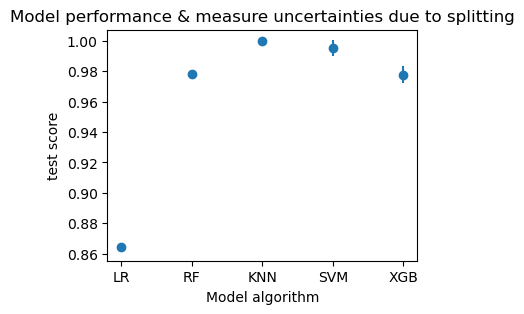

In [42]:
import matplotlib.pylab as plt
model_means = [np.mean(lr_test_scores),np.mean(rf_test_scores),np.mean(knn_test_scores), \
               np.mean(svm_test_scores),np.mean(xgb_test_scores)]
model_strs = [np.std(lr_test_scores),np.std(rf_test_scores),np.std(knn_test_scores), \
               np.std(svm_test_scores),np.std(xgb_test_scores)]
plt.figure(figsize=(4,3))
plt.errorbar(['LR','RF','KNN','SVM','XGB'], model_means, yerr=model_strs, fmt='o')
plt.title('Model performance & measure uncertainties due to splitting')
plt.xlabel('Model algorithm')
plt.ylabel('test score')
plt.savefig('../figures/models_performance.png',dpi=300,bbox_inches="tight")
plt.show()

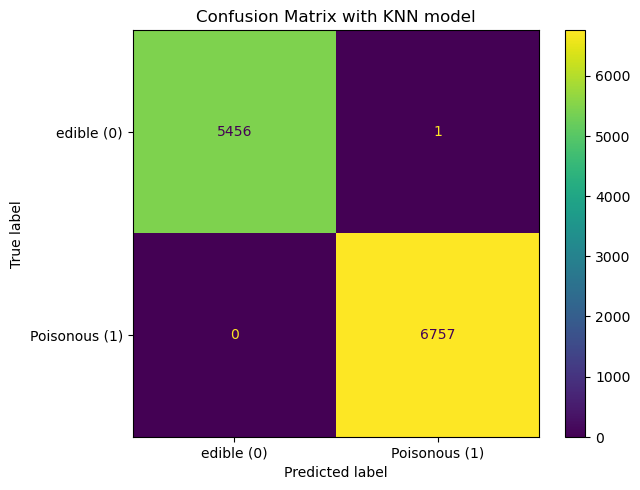

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

best_index = knn_test_scores.index(max(knn_test_scores))
best_model = knn_models[best_index]
y_true = np.array(knn_test_sets[best_index][1])
y_pred = best_model.predict(knn_test_sets[best_index][0])

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['edible (0)', 'Poisonous (1)'])
disp.plot()
plt.tight_layout()
plt.title('Confusion Matrix with KNN model')
plt.savefig('../figures/confusion_matrix.png',dpi=300,bbox_inches="tight")
plt.show()

In [44]:
# when computing the global, local feature importance 
df_test = best_model[0].transform(knn_test_sets[best_index][0])
df_test = pd.DataFrame(data=df_test,columns = best_model[0].get_feature_names_out())
df_test.head()

,onehot__cap-shape_b,onehot__cap-shape_c,onehot__cap-shape_f,onehot__cap-shape_o,onehot__cap-shape_p,onehot__cap-shape_s,onehot__cap-shape_x,onehot__cap-surface_Missing,onehot__cap-surface_d,onehot__cap-surface_e,...,onehot__habitat_p,onehot__habitat_u,onehot__habitat_w,onehot__season_a,onehot__season_s,onehot__season_u,onehot__season_w,std__cap-diameter,std__stem-height,std__stem-width
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.597625,-0.487484,1.361646
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.094407,-0.650122,0.796460
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.555225,-0.706306,-0.504366
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.972575,-0.274576,-1.054600
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.062336,0.148282,-0.615010


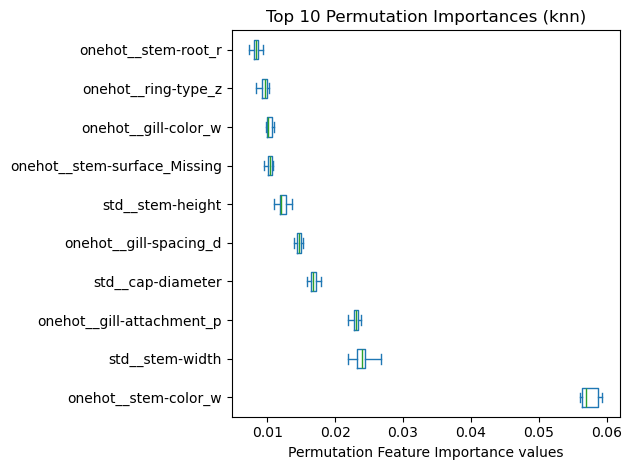

In [45]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
# if running too much time, you can use reduced data set
best_index = knn_test_scores.index(max(knn_test_scores))
best_model = knn_models[best_index]
df_test = best_model[0].transform(knn_test_sets[best_index][0])
df_test = pd.DataFrame(data=df_test,columns = best_model[0].get_feature_names_out())
result = permutation_importance(best_model.named_steps['model'], df_test, knn_test_sets[best_index][1], n_repeats=10, random_state=0)

sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx[::-1]].T,
    columns=df_test.columns[sorted_importances_idx[::-1]],
)

# top 10 importance features
top_importances = importances.iloc[:,0:10]

ax = top_importances.plot.box(vert=False, whis=10)
ax.set_title("Top 10 Permutation Importances (knn)")
ax.set_xlabel("Permutation Feature Importance values")
ax.figure.tight_layout()
plt.savefig('../figures/permutation_importance.png',dpi=300,bbox_inches="tight")


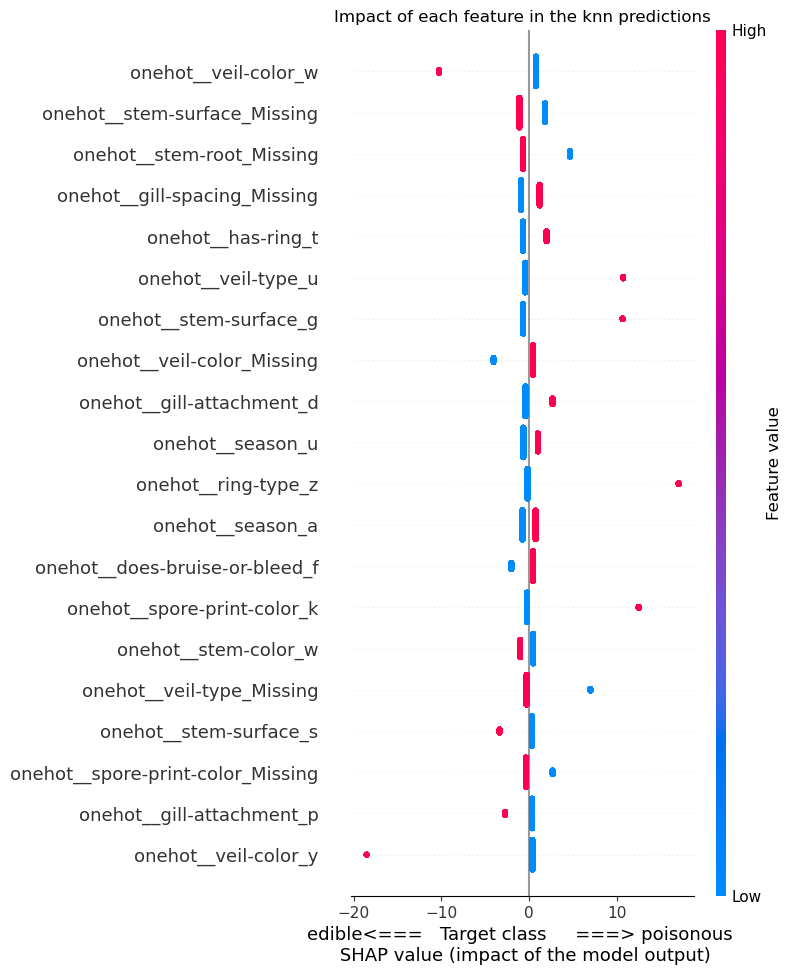

In [46]:
import shap
shap.initjs()


best_index = lr_test_scores.index(max(lr_test_scores))
best_model = lr_models[best_index]
df_test = best_model[0].transform(lr_test_sets[best_index][0])
df_test = pd.DataFrame(data=df_test,columns = best_model[0].get_feature_names_out())

#explainer = shap.KernelExplainer(best_model.named_steps['model'].predict_proba, df_test)
#only two features when I use KernelExplainer
explainer = shap.LinearExplainer(best_model.named_steps['model'], df_test, feature_perturbation="interventional")
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values, df_test, show=False)
fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel("edible<===   Target class     ===> poisonous \n SHAP value (impact of the model output)")
ax.set_title("Impact of each feature in the knn predictions")
plt.savefig('../figures/knn_shap_value.png',dpi=300,bbox_inches="tight")
plt.show()

In [47]:
# true result : Benign, predicted result : Benign (0)
print()
shap.initjs()
index = 0 # the index of the point to explain
shap.force_plot(explainer.expected_value, shap_values[index,:], features = df_test.iloc[index,:],show=False)


In [48]:
shap.force_plot(explainer.expected_value, shap_values[index,:], features=df_test.iloc[index,:], show=False, matplotlib=True)

# save
plt.savefig('../figures/knn_shap_value_0.png', dpi=300, bbox_inches="tight")
plt.close()

In [49]:
print()
shap.initjs()
index = 200 # the index of the point to explain
shap.force_plot(explainer.expected_value, shap_values[index,:], features = df_test.iloc[index,:],show=False)

In [50]:
shap.force_plot(explainer.expected_value, shap_values[index,:], features=df_test.iloc[index,:], show=False, matplotlib=True)

# save figure
plt.savefig('../figures/knn_shap_value_100.png', dpi=300, bbox_inches="tight")
plt.close()

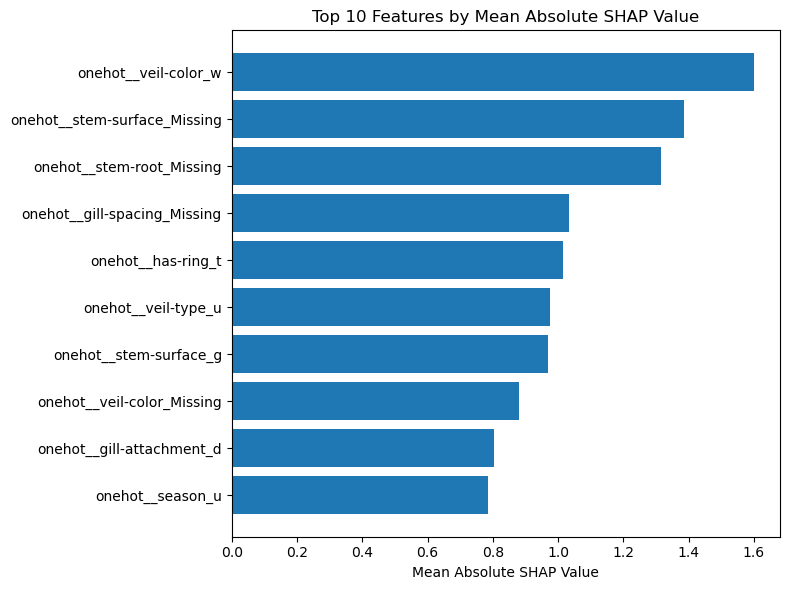

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get the shap value
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# from top to low value
feature_names = df_test.columns
sorted_indices = np.argsort(mean_abs_shap_values)[::-1]  # 从大到小排序
top_10_indices = sorted_indices[:10]

top_10_features = feature_names[top_10_indices]
top_10_values = mean_abs_shap_values[top_10_indices]

# plot
plt.figure(figsize=(8,6))
plt.barh(top_10_features[::-1], top_10_values[::-1])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Top 10 Features by Mean Absolute SHAP Value')
plt.tight_layout()
plt.savefig('../figures/top10_shap_features.png', dpi=300, bbox_inches='tight')
plt.show()


In [52]:
# Coefficients of linear models
from sklearn.pipeline import make_pipeline
# read in the dataset as a dataframe
df = pd.read_csv('../data/secondary_data.csv', sep=';')
df['class'] = df['class'].map({'p': 1, 'e': 0})
y = df['class']
X = df.loc[:, df.columns != 'class']

onehot_ftrs = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment',
    'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color',
    'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
    'habitat', 'season'
]
std_ftrs = ['cap-diameter', 'stem-height', 'stem-width']
X.loc[:, onehot_ftrs] = X[onehot_ftrs].fillna('Missing')

# function for the ML pipeline as outlined above 
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid):
    
    # lists to be returned 
    test_scores = []
    best_models = []
    test_sets = []

    # your code here...
    for random_state in range(5):
        # Split data
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state*42)
        
        # use KFold with 4 folds
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state*42)
        
        # Create pipeline
        # scale all of them
        final_scaler = StandardScaler()
        pipe = make_pipeline(preprocessor,final_scaler,ML_algo)
        
        # Use GridSearchCV to find the best parameters
        grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=1)
        grid_search.fit(X_other, y_other)
        
        # Get the best model and calculate RMSE on test set
        best_model = grid_search.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Append results to lists
        test_scores.append(test_accuracy)
        best_models.append(best_model)
        test_sets.append([X_test, y_test])
        
        # Print statements for debugging
        print(f"Random State {random_state*42}: Test Accuracy = {test_accuracy}")
        print(f"Best Parameters: {grid_search.best_params_}")

    return test_scores, best_models, test_sets


In [53]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Define Logistic regression model
ML_algo = LogisticRegression()

# Define parameter grid for LogisticRegression
param_grid = {'logisticregression__C': [100, 10, 1.0, 0.1, 0.01]}

# Call the function
test_scores, best_models, test_sets = MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 0: Test Accuracy = 0.8653184869821516
Best Parameters: {'logisticregression__C': 0.1}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 42: Test Accuracy = 0.8647453741607991
Best Parameters: {'logisticregression__C': 100}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 84: Test Accuracy = 0.8649909939413788
Best Parameters: {'logisticregression__C': 10}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 126: Test Accuracy = 0.8605698378909448
Best Parameters: {'logisticregression__C': 10}
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Random State 168: Test Accuracy = 0.8634354019977075
Best Parameters: {'logisticregression__C': 1.0}


In [54]:
best_index = test_scores.index(max(test_scores))
best_model = best_models[best_index]

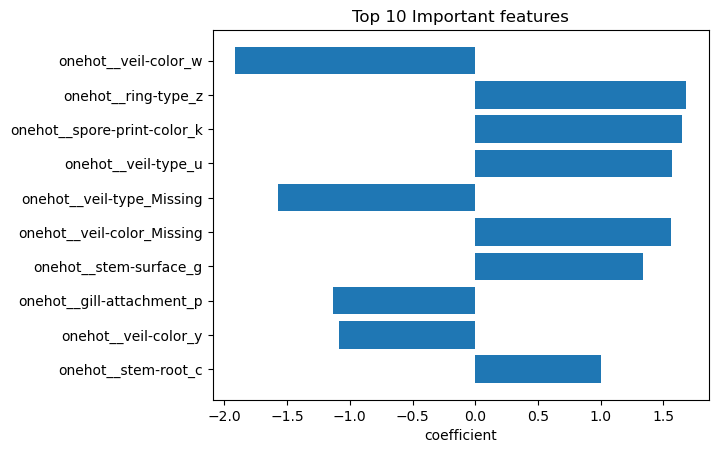

In [55]:
coefs = best_model[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.figure(figsize=(6.4,4.8))
plt.rcParams.update({'font.size': 10})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),df_test.columns[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('Top 10 Important features')
plt.savefig('../figures/LR_coefs_scaled.png',dpi=300, bbox_inches="tight")
plt.show()

In [57]:
import pickle
best_index = lr_test_scores.index(max(lr_test_scores))
best_model = lr_models[best_index]
pickle.dump(best_model, open('../results/model.pkl','wb'))